<h1 align="center"> What physiochemical properties make a wine "Good"?</h1>
<h3 align="center"> Last Update: 09/2020 </h3>

# 1. Introduction

This work is inspired by the increasing popularity of a local winery in Missouri, USA. I like their taste and visit the vinery a few times every year, and take their wine as gifts to my friends and family. The vinery has a strict standard to insepct the wine quality by various chemical or physical proterties, but could we try something new? This "wine-qualilty" dataset directs me that machine learning algorithm might be a good choice. 

Data Source:https://archive.ics.uci.edu/ml/datasets/wine+quality

Input: 11 different physiochemical properties

Output: Wine quality (0-10)

Target: Classify the wine quality into "good" and "bad" (will define the criteria for "good" quality)

# 2. Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline


In [2]:
wine = pd.read_csv('.../Red_Wine/winequality_red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 2.1 How the data is distributed ?

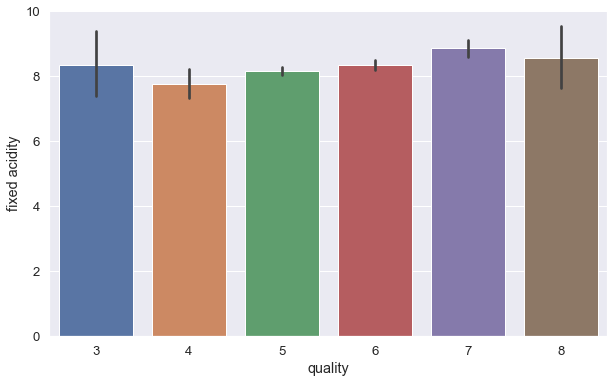

In [9]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "fixed acidity", data = wine)

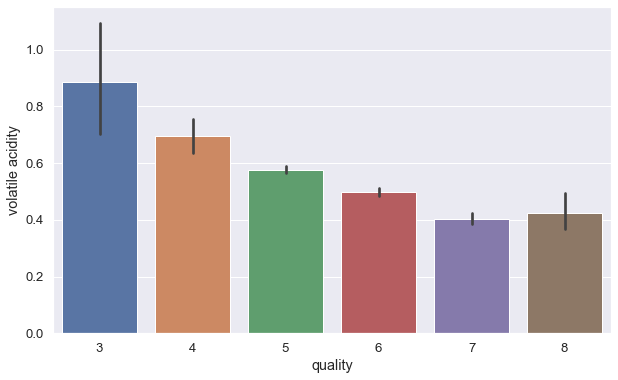

In [10]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "volatile acidity", data = wine)

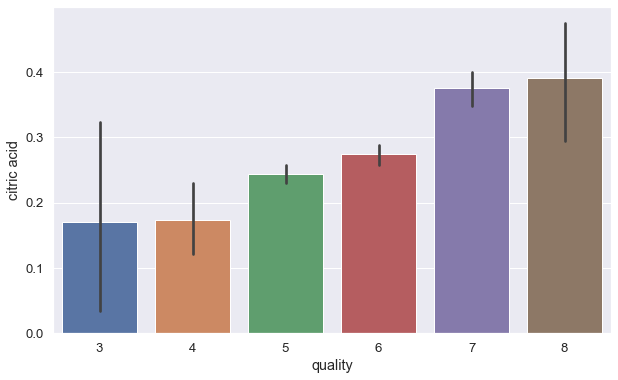

In [11]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "citric acid", data = wine)

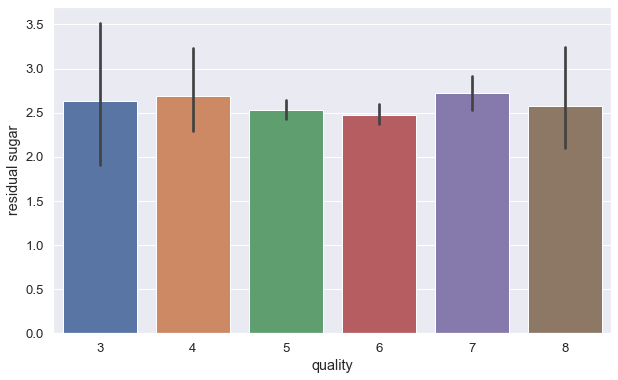

In [12]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "residual sugar", data = wine)

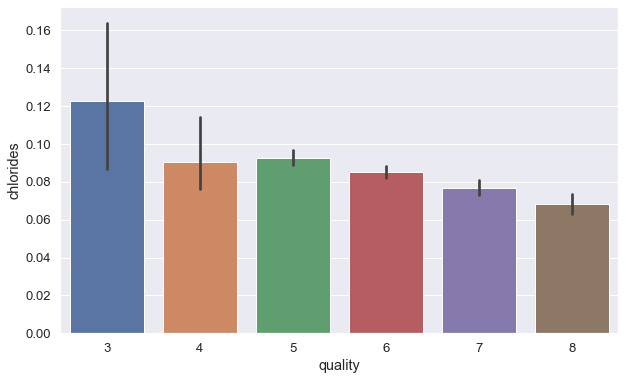

In [13]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "chlorides", data = wine)

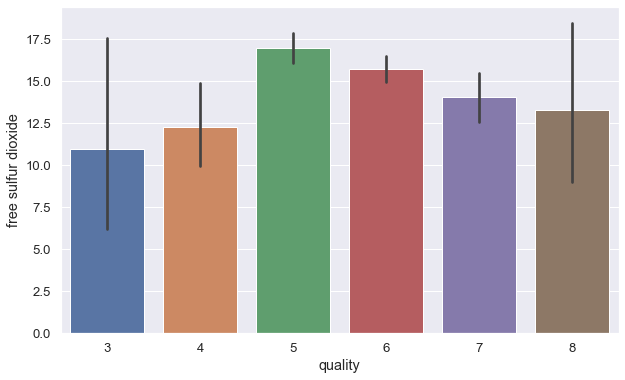

In [14]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "free sulfur dioxide", data = wine)

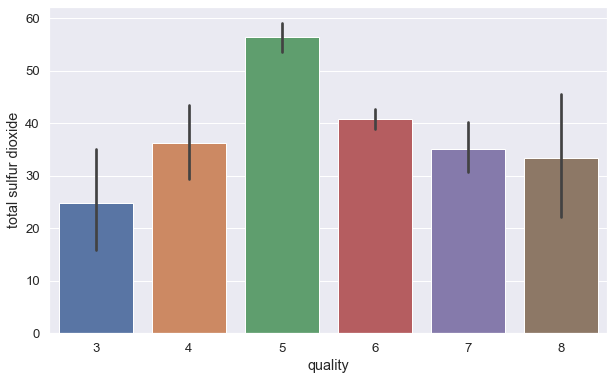

In [15]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "total sulfur dioxide", data = wine)

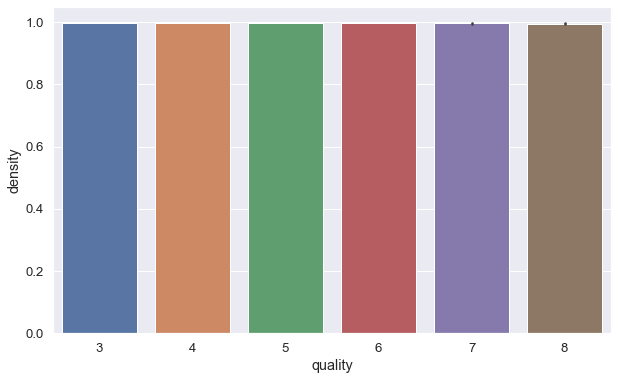

In [16]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "density", data = wine)

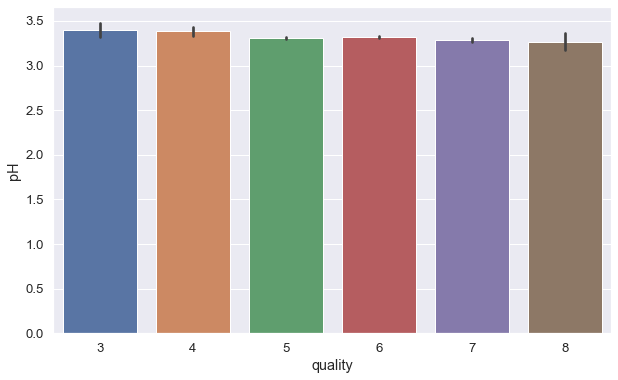

In [17]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "pH", data = wine)

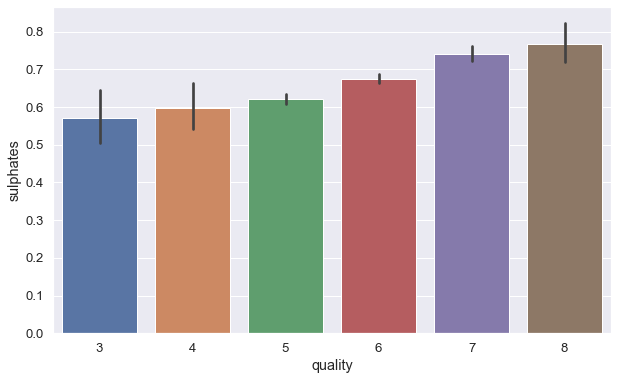

In [18]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "sulphates", data = wine)

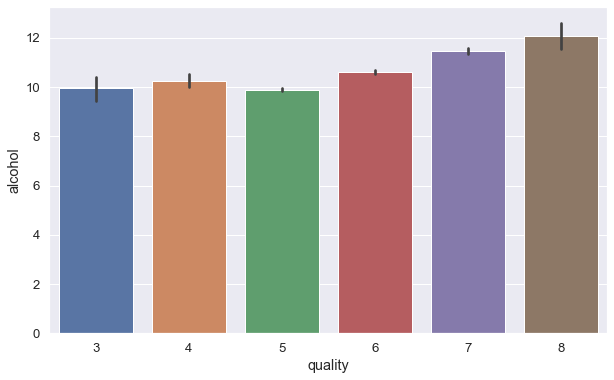

In [19]:
sns.set(font_scale = 1.2)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "alcohol", data = wine)

In [20]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2.2 Data Preprocessing

In [21]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [22]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [23]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [24]:
wine["quality"] = label_quality.fit_transform(wine["quality"])

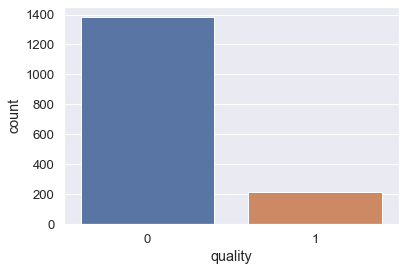

In [26]:
sns.countplot(wine["quality"])

This is not a balanced dataset

In [27]:
X = wine.drop("quality", axis = 1)
y = wine["quality"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [29]:
#Apply the standard scaling to the dataset
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 3. Training and Evaluation 

## 3.1 Random Forest Classification

In [31]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [32]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       276
           1       0.80      0.36      0.50        44

   micro avg       0.90      0.90      0.90       320
   macro avg       0.85      0.67      0.72       320
weighted avg       0.89      0.90      0.88       320



In [33]:
print(confusion_matrix(y_test, pred_rfc))

[[272   4]
 [ 28  16]]


## 3.2 Stochastic Gradient Decent Classifier

In [35]:
sgd = SGDClassifier(penalty = None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

C:\Users\cui\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [36]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       276
           1       0.60      0.48      0.53        44

   micro avg       0.88      0.88      0.88       320
   macro avg       0.76      0.71      0.73       320
weighted avg       0.88      0.88      0.88       320



In [37]:
print(confusion_matrix(y_test, pred_sgd))

[[262  14]
 [ 23  21]]


## 3.3 Suppot Vector Classifier

In [39]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [40]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       276
           1       0.60      0.20      0.31        44

   micro avg       0.87      0.87      0.87       320
   macro avg       0.74      0.59      0.62       320
weighted avg       0.85      0.87      0.84       320



## 3.4 Optimization 

In [43]:
param = {
        "C":[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
        "kernel":["linear", "rbf"],
        "gamma":[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid = param, scoring = "accuracy", cv = 10)

In [44]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.2, 'kernel': 'rbf'}

In [46]:
svc2 = SVC(C = 1.4, gamma = 1.2, kernel = "rbf")
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       276
           1       0.79      0.25      0.38        44

   micro avg       0.89      0.89      0.89       320
   macro avg       0.84      0.62      0.66       320
weighted avg       0.88      0.89      0.86       320



In [48]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9147118964780565

# 4. Summary 

In this work, the exploration was done on the "wine_quality" dataset. Then random forest, stochastic gradient descent and support vector classifer models were performed and the classification results were evaluated. By grdisearch and cross-validation optimization, the accuracy was improved to 91% using random forest classifier from 84%. 